Nama: Muhammad Rizky

DBS Program


**Proyek Predicted Heart Falure**

**Deskripsi Proyek**

Proyek ini bertujuan untuk mengembangkan model machine learning yang dapat memprediksi risiko penyakit jantung dengan lebih akurat dan efisien. Saat ini, deteksi risiko penyakit jantung masih sering dilakukan secara manual melalui pemeriksaan klinis yang memakan waktu, sumber daya medis, dan terkadang kurang presisi. Hal ini dapat menyebabkan keterlambatan dalam penanganan pasien berisiko tinggi serta meningkatkan biaya kesehatan.

Model prediksi penyakit jantung yang dikembangkan melalui proyek ini dapat membantu mengatasi masalah tersebut dengan memberikan solusi yang lebih cepat, akurat, dan andal dalam mengidentifikasi pasien yang berisiko. Dengan demikian, dokter dan penyedia layanan kesehatan dapat mengambil langkah preventif atau intervensi lebih awal, mengurangi angka kematian dan meningkatkan efisiensi pelayanan kesehatan secara keseluruhan.

**Problem Domain**

Pada bagian ini, kita menjelaskan latar belakang dan tujuan dari proyek. Proyek ini bertujuan untuk mengembangkan model machine learning yang dapat memprediksi risiko penyakit jantung secara akurat. Hal ini akan membantu meningkatkan proses deteksi dini risiko penyakit jantung, sehingga memungkinkan intervensi medis lebih awal dan pengambilan keputusan yang lebih baik untuk pasien berisiko.

**Import Library Proyek**

In [ ]:
!pip install kaggle
#install library untuk visualisi data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Libarary untuk upload File
from google.colab import files
#Libarary untuk split data
from sklearn.model_selection import train_test_split,  GridSearchCV
#Libarary untuk evaluasi model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import  LabelEncoder, StandardScaler

**Data Understanding**

Di bagian ini, kita memahami dan mengeksplorasi dataset yang digunakan. Dataset ini berisi informasi medis pasien, seperti usia, jenis kelamin, tekanan darah, kadar kolesterol, dan beberapa variabel klinis lain yang relevan dengan penyakit jantung. Berikut adalah beberapa kolom yang ada dalam dataset:

    Age: Usia pasien
    Sex: Jenis kelamin pasien (M/F)
    RestingBP: Tekanan darah saat istirahat
    Cholesterol: Kadar kolesterol pasien
    MaxHR: Detak jantung maksimum yang dicapai
    HeartDisease: Label target (1 jika pasien memiliki penyakit jantung, 0 jika tidak)

**Data Loading**

In [ ]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"muhammadrizky102356","key":"85af409ebff1292e0f00a1b8d1eebe89"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction
!unzip heart-failure-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 17.8MB/s]
Archive:  heart-failure-prediction.zip
  inflating: heart.csv               



**2.2 Exploratory Data Analysis (EDA)**

Exploratory data analysis merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Teknik ini biasanya menggunakan bantuan statistik dan representasi grafis atau visualisasi.

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Dataset berisi data dari berbagai pasien terdapat 11 kolom, antara lain:




    Age (Usia): Usia pasien dalam tahun.
    Sex (Jenis Kelamin): Jenis kelamin pasien (M untuk Male/L untuk Female).
    ChestPainType (Tipe Nyeri Dada): Klasifikasi tipe nyeri dada yang dialami pasien.
    RestingBP (Tekanan Darah Saat Istirahat): Tekanan darah sistolik dalam mm Hg.
    Cholesterol: Tingkat kolesterol serum dalam mg/dl.
    FastingBS (Gula Darah Puasa): Gula darah puasa dalam mg/dl (1 jika lebih dari 120 mg/dl, 0 jika sebaliknya).
    RestingECG (Elektrokardiogram Saat Istirahat): Hasil elektrokardiogram pasien saat istirahat.
    MaxHR (Detak Jantung Maksimum): Detak jantung maksimum yang dicapai pasien selama aktivitas.
    ExerciseAngina (Angina akibat Latihan): Apakah pasien mengalami angina saat berolahraga (1: Ya, 0: Tidak).
    Oldpeak: Depresi ST yang diukur dari puncak latihan hingga saat istirahat.
    ST_Slope: Kemiringan segmen ST saat latihan.
    HeartDisease (Penyakit Jantung): Label target, menunjukkan apakah pasien memiliki penyakit jantung (1: Ya, 0: Tidak).




In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Menangani Missing Values dan Outlier**

Dalam analisis data, penanganan missing values dan outlier adalah langkah penting untuk memastikan bahwa data yang digunakan bersih dan representatif. Missing values dapat mengganggu performa model karena banyak algoritma machine learning tidak dapat menangani nilai yang hilang secara langsung. Sedangkan outlier, yaitu data yang nilainya sangat jauh dari data lainnya, bisa mempengaruhi hasil prediksi secara signifikan.

**Mengatasi Missing Values**

Missing values dapat diatasi dengan berbagai metode seperti menghapus baris atau kolom yang memiliki missing values.

In [ ]:
# Menghapus baris yang memiliki missing values
df.dropna(inplace=True)



**Visulisasi Outlier**

In [ ]:
#kolom untuk numerik
#kolom untuk Kategori
numerical_features = df.select_dtypes(include=['int64', 'float64'])
categorical_features = df.select_dtypes(include=['object'])

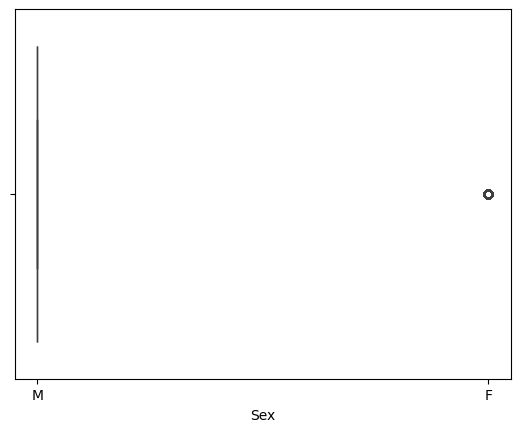

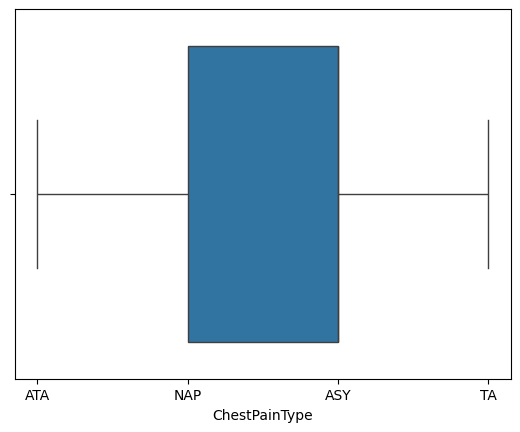

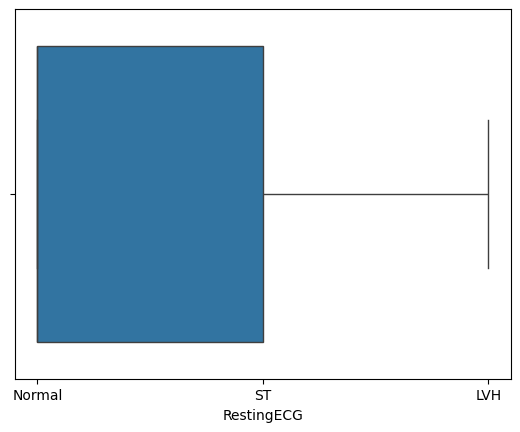

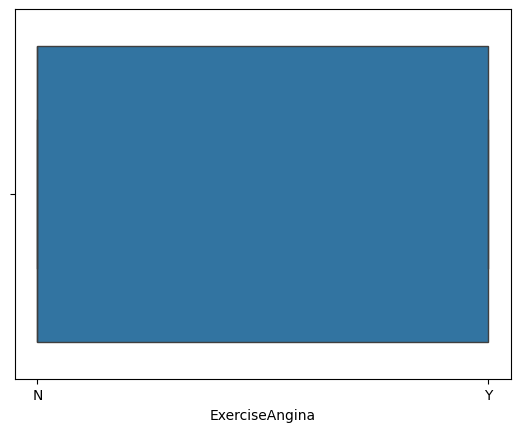

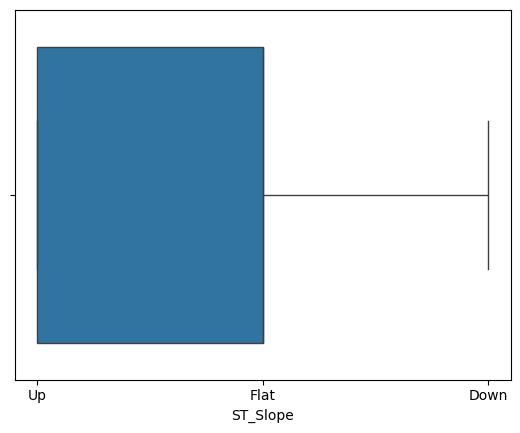

In [ ]:
for column in categorical_features:
  plt.figure()
  sns.boxplot(data=categorical_features, x=column)

**Menangani Outlier**

In [ ]:

# Mendeteksi outlier menggunakan IQR untuk kolom numerik
Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mendeteksi baris yang mengandung outlier
outliers = ((numerical_features < lower_bound) | (numerical_features > upper_bound)).any(axis=1)

# Menampilkan baris yang mengandung outlier
df_outliers = df[outliers]
print(df_outliers)


     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
28    53   F           ATA        113          468          0     Normal   
30    53   M           NAP        145          518          0     Normal   
36    65   M           ASY        140          306          1     Normal   
38    48   F           ATA        120          177          1         ST   
52    45   M           ATA        140          224          1     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
900   58   M           ASY        114          318          0         ST   
901   58   F           ASY        170          225          1        LVH   
908   63   M           ASY        140          187          0        LVH   
911   59   M           ASY        164          176          1        LVH   
914   68   M           ASY        144          193          1     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
28     127              N  

**Univariate Analysis**

Univariate analysis dilakukan untuk memahami distribusi dari setiap fitur secara individual. Kita akan memeriksa apakah data terdistribusi normal, apakah ada skewness, dan bagaimana distribusi nilai dalam setiap variabel.

<Figure size 1200x800 with 0 Axes>

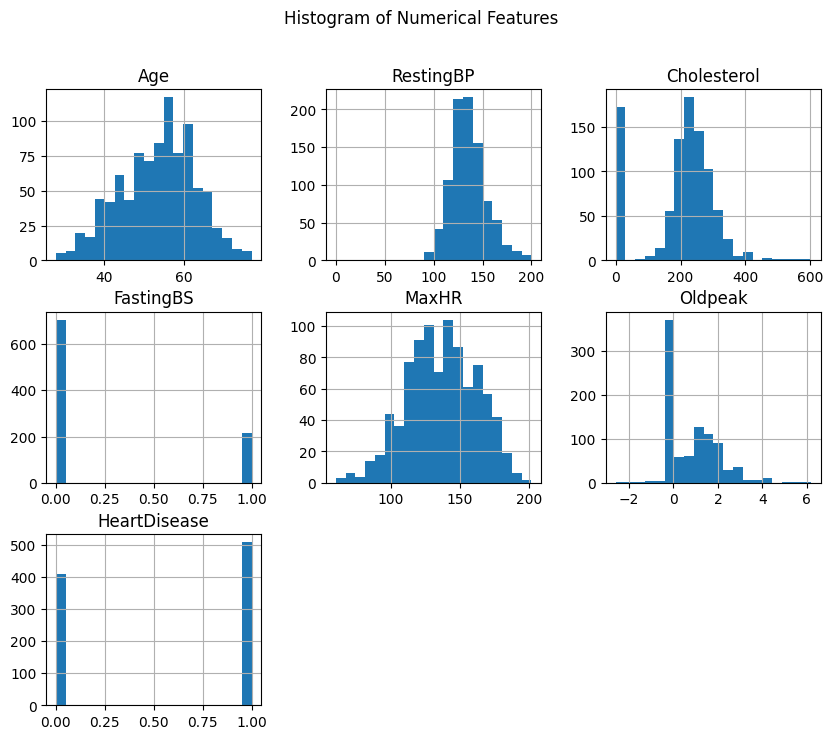

In [ ]:

# Plot histograms for numerical features
plt.figure(figsize=(12, 8))
numerical_features.hist(bins=20, figsize=(10, 8))
plt.suptitle('Histogram of Numerical Features')
plt.show()

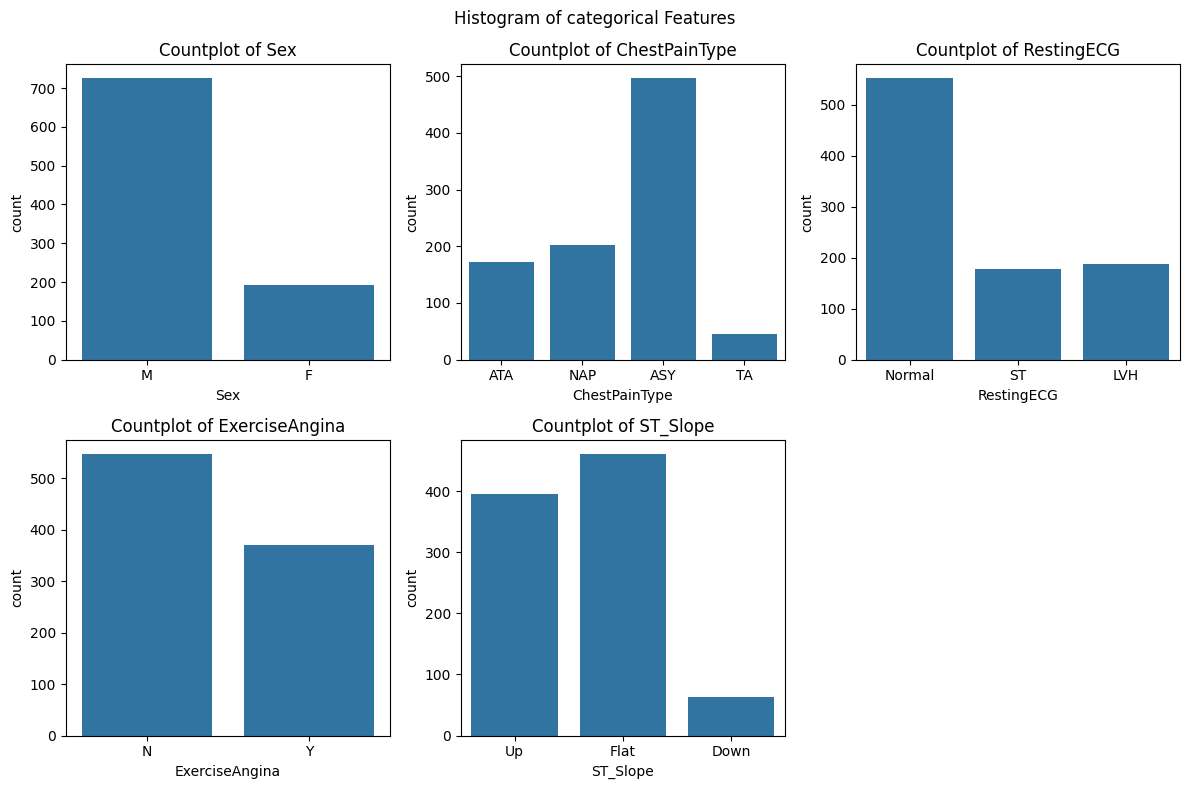

In [ ]:
# Plot countplots for categorical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_features.columns, 1):
    plt.subplot(2, 3, i)
    plt.suptitle('Histogram of categorical Features')
    sns.countplot(data=categorical_features, x=col)
    plt.title(f'Countplot of {col}')
    plt.tight_layout()

plt.show()

**Exploratory Data Analysis - Multivariate Analysis**

Multivariate analysis dilakukan untuk memahami hubungan antara berbagai fitur dalam dataset. Ini membantu kita dalam mengidentifikasi fitur mana yang paling berpengaruh dalam memprediksi target variabel.


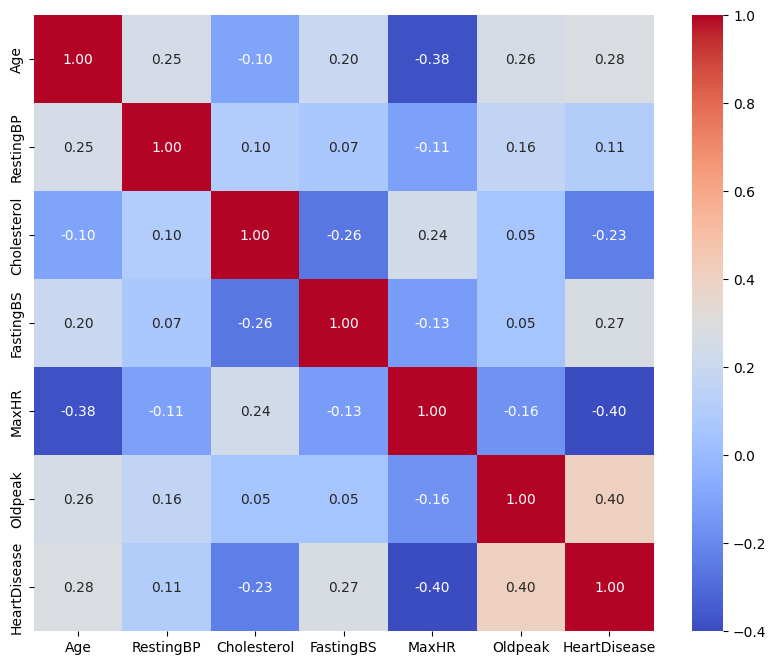

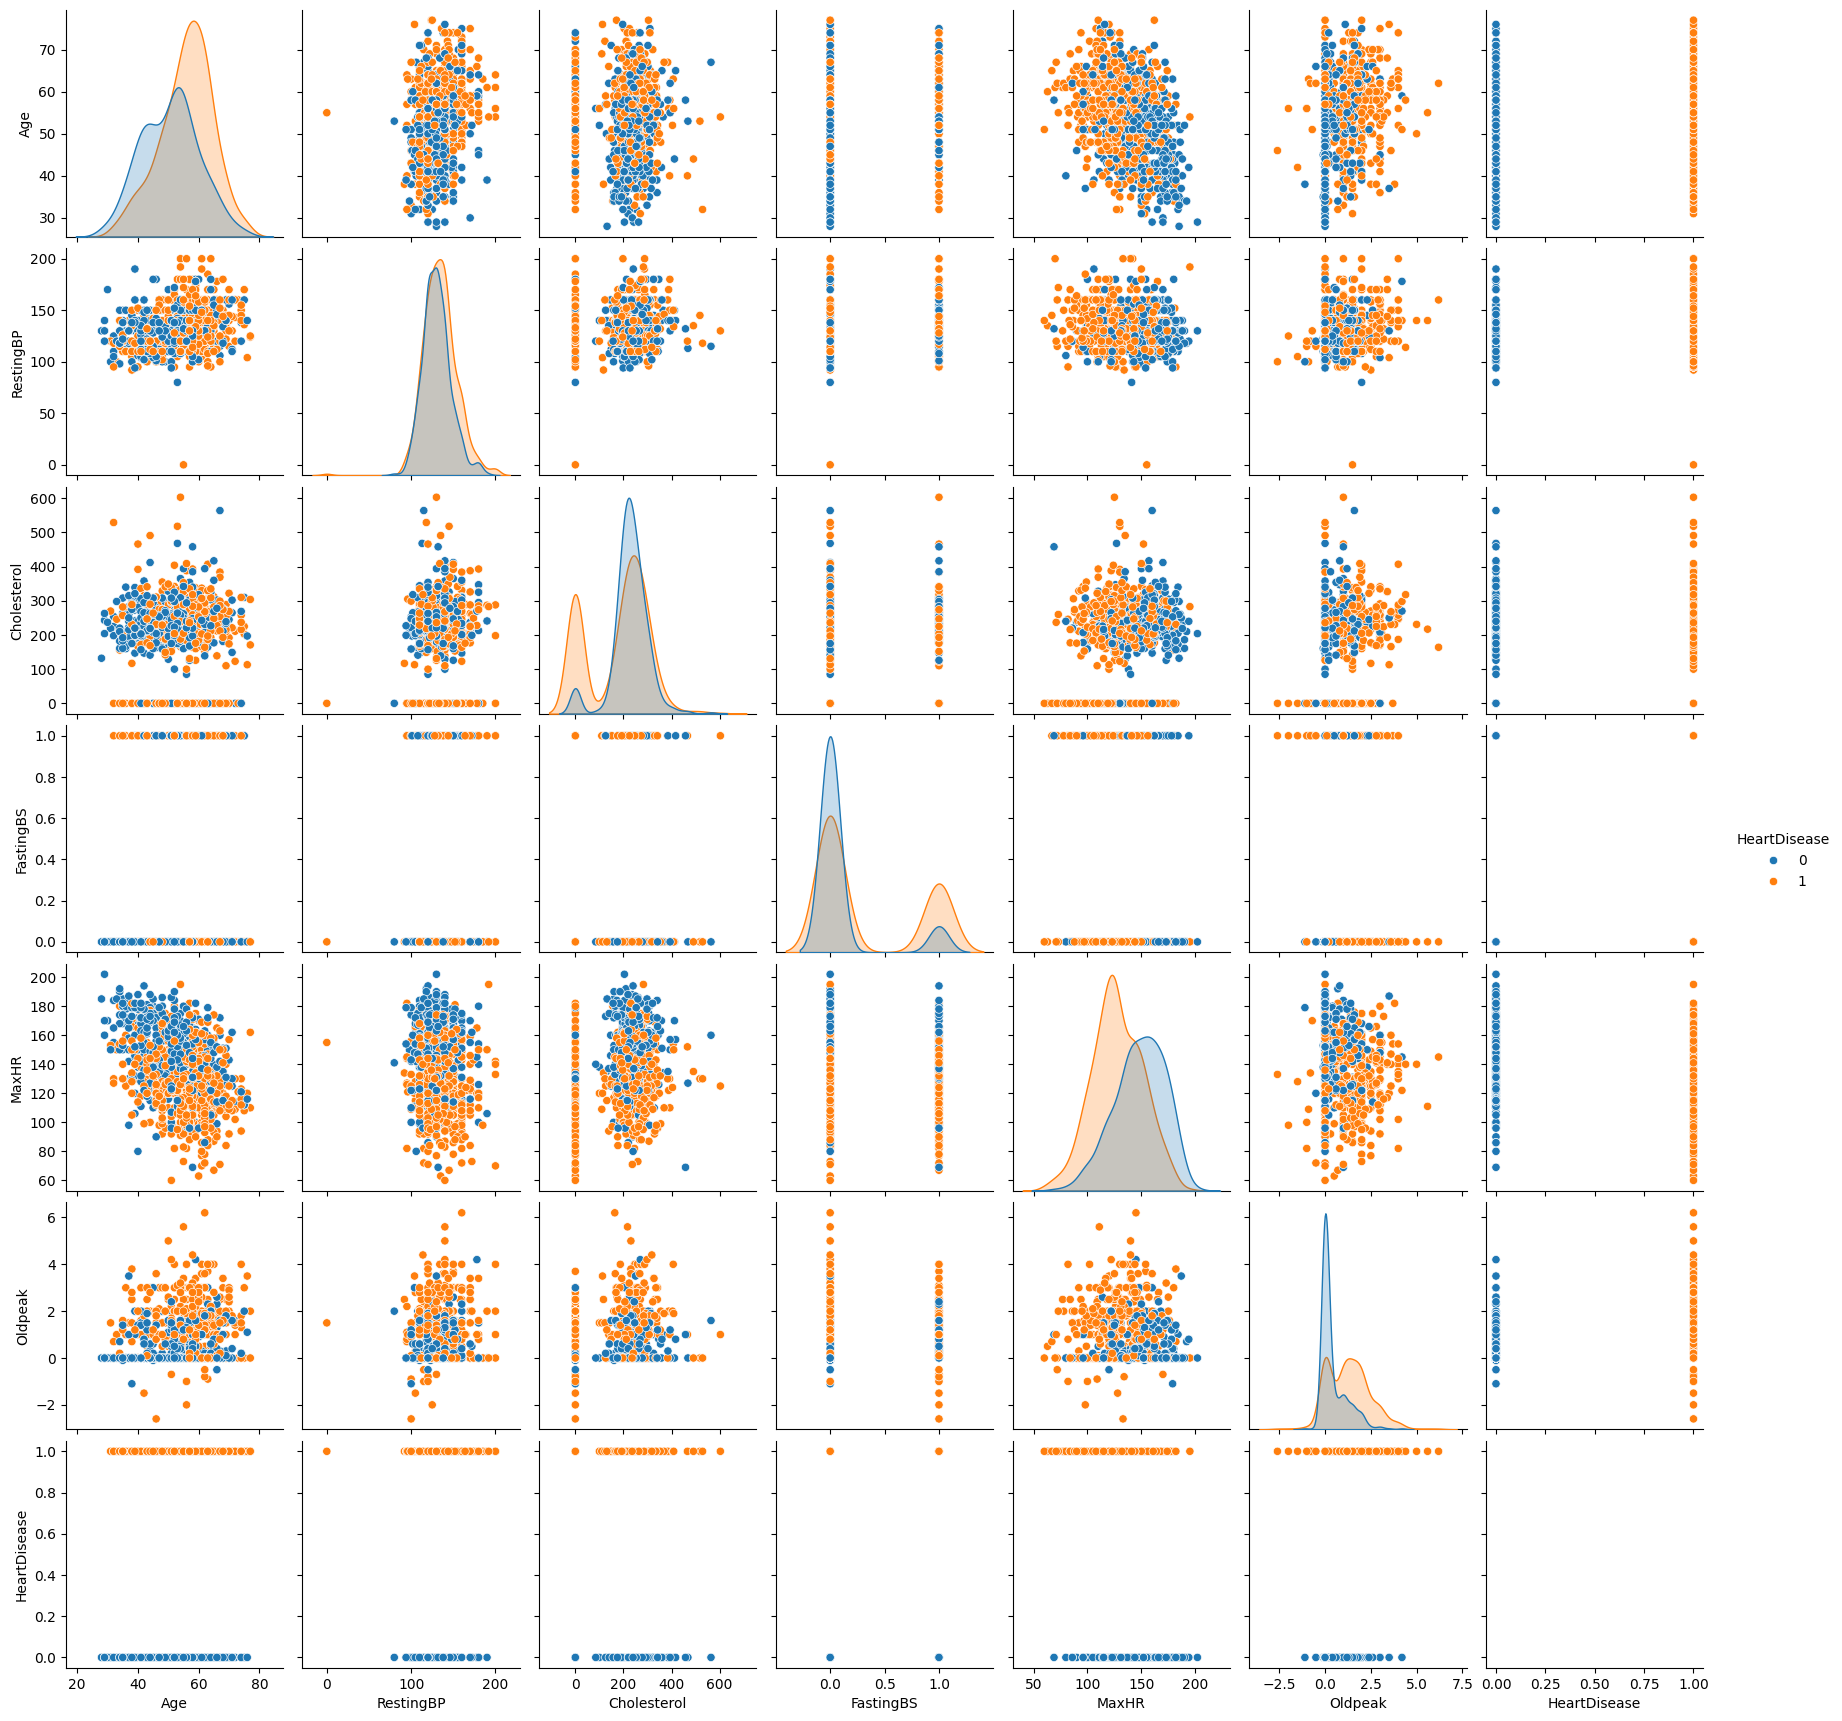

In [ ]:
# Heatmap korelasi untuk fitur numerik
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Pairplot antara fitur numerik dan target (HeartDisease)
sns.pairplot(df, hue='HeartDisease', vars=numerical_features)
plt.show()



**Categorical Features**

Fitur kategorikal adalah variabel yang nilainya bersifat diskrit atau terbatas, misalnya Jenis Kelamin, Jenis Nyeri Dada, atau RestingECG dalam dataset prediksi penyakit jantung. Fitur-fitur ini tidak memiliki nilai numerik, melainkan berupa kategori atau label.

Dalam code yang kamu berikan, kita akan mengeksplorasi hubungan antara fitur kategorikal dengan variabel target (HeartDisease) untuk melihat bagaimana distribusi dan rata-rata kejadian penyakit jantung berdasarkan tiap kategori dari fitur-fitur tersebut.

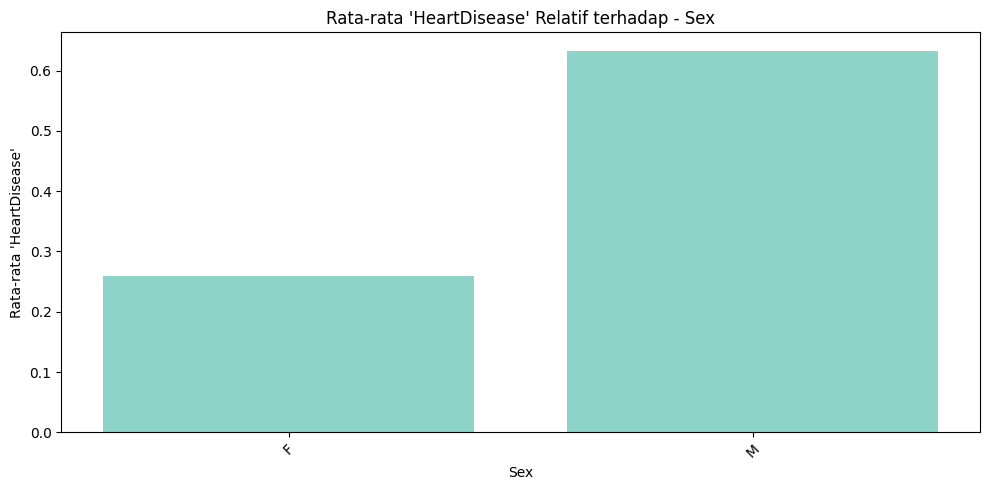

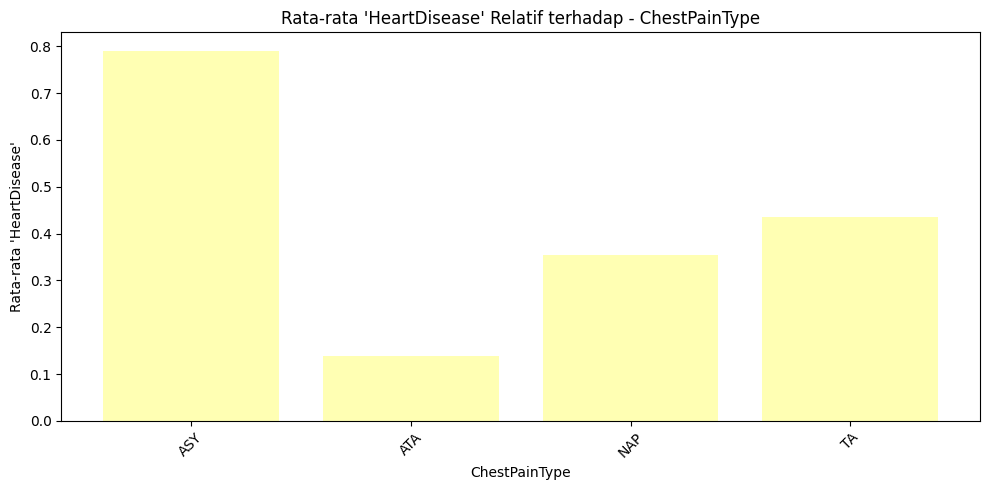

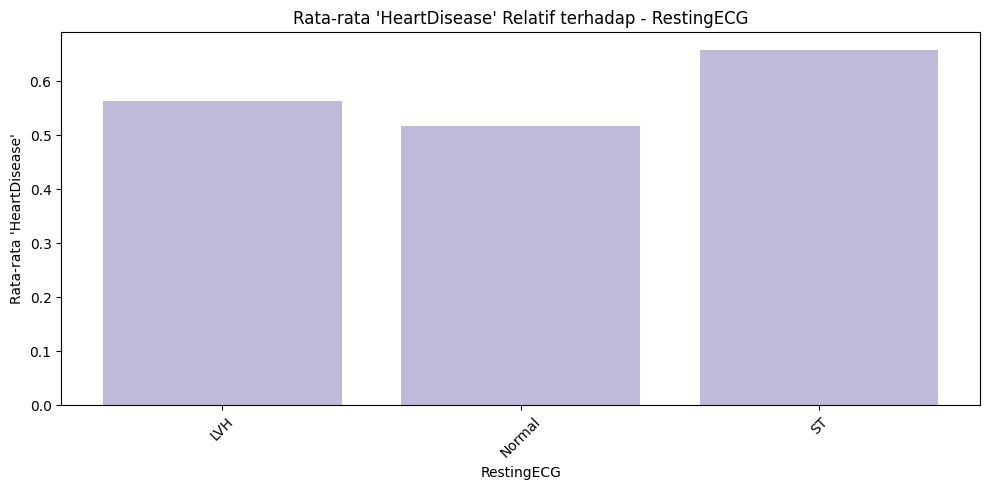

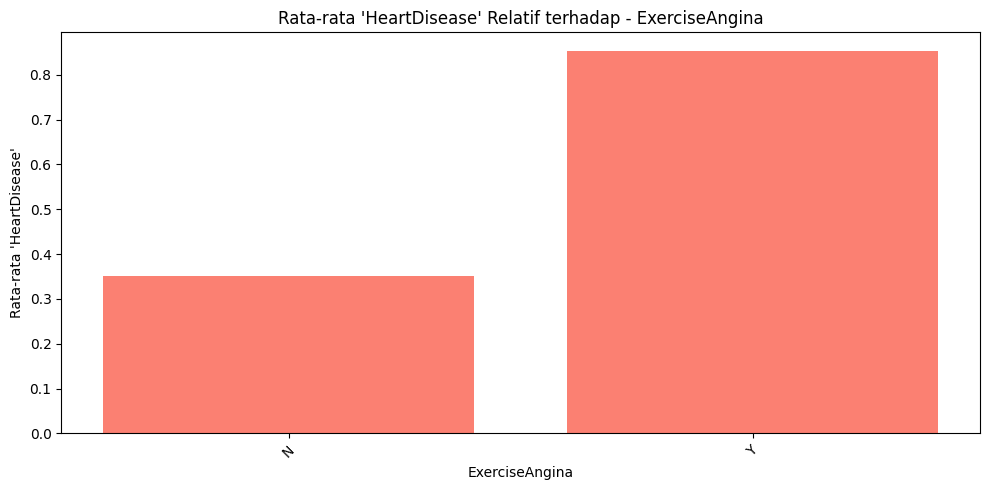

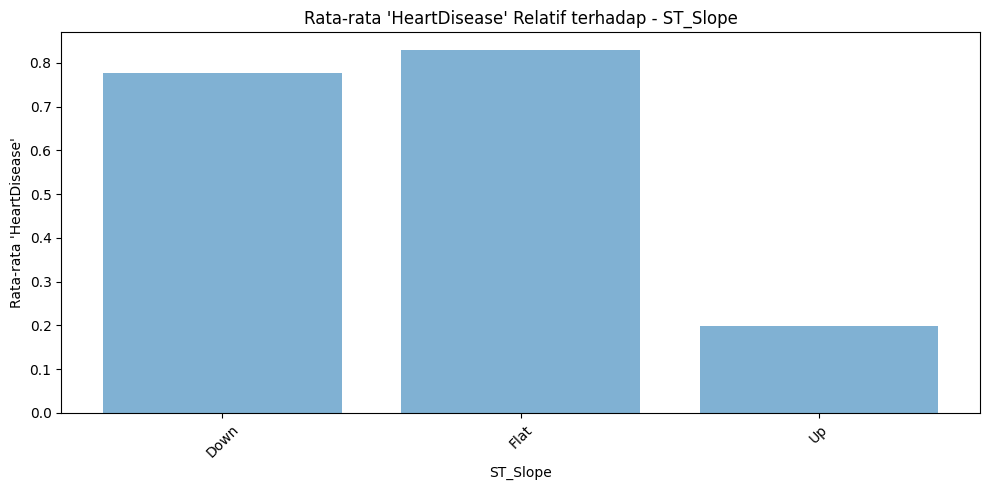

In [ ]:

# Pilih fitur kategorikal
cat_features = df.select_dtypes(include='object').columns.to_list()

# Mengambil palet warna dari Seaborn
palette = sns.color_palette("Set3", len(cat_features))

for i, col in enumerate(cat_features):
    # Menghitung rata-rata HeartDisease berdasarkan fitur
    mean_values = df.groupby(col)['HeartDisease'].mean().reset_index()

    # Membuat diagram batang
    plt.figure(figsize=(10, 5))
    plt.bar(mean_values[col], mean_values['HeartDisease'], color=palette[i % len(palette)])

    plt.title("Rata-rata 'HeartDisease' Relatif terhadap - {}".format(col))
    plt.xlabel(col)
    plt.ylabel("Rata-rata 'HeartDisease'")
    plt.xticks(rotation=45)  # Memutar label sumbu x jika perlu
    plt.tight_layout()  # Mengatur layout agar tidak terpotong
    plt.show()



**Numerical Features**

Fitur numerikal adalah variabel yang nilainya berupa angka dan bisa diukur atau dihitung, seperti Age, RestingBP, Cholesterol, dan MaxHR dalam dataset prediksi penyakit jantung. Analisis fitur numerikal bertujuan untuk memahami distribusi data, korelasi antara fitur-fitur numerikal, dan bagaimana fitur tersebut berinteraksi dengan variabel target.

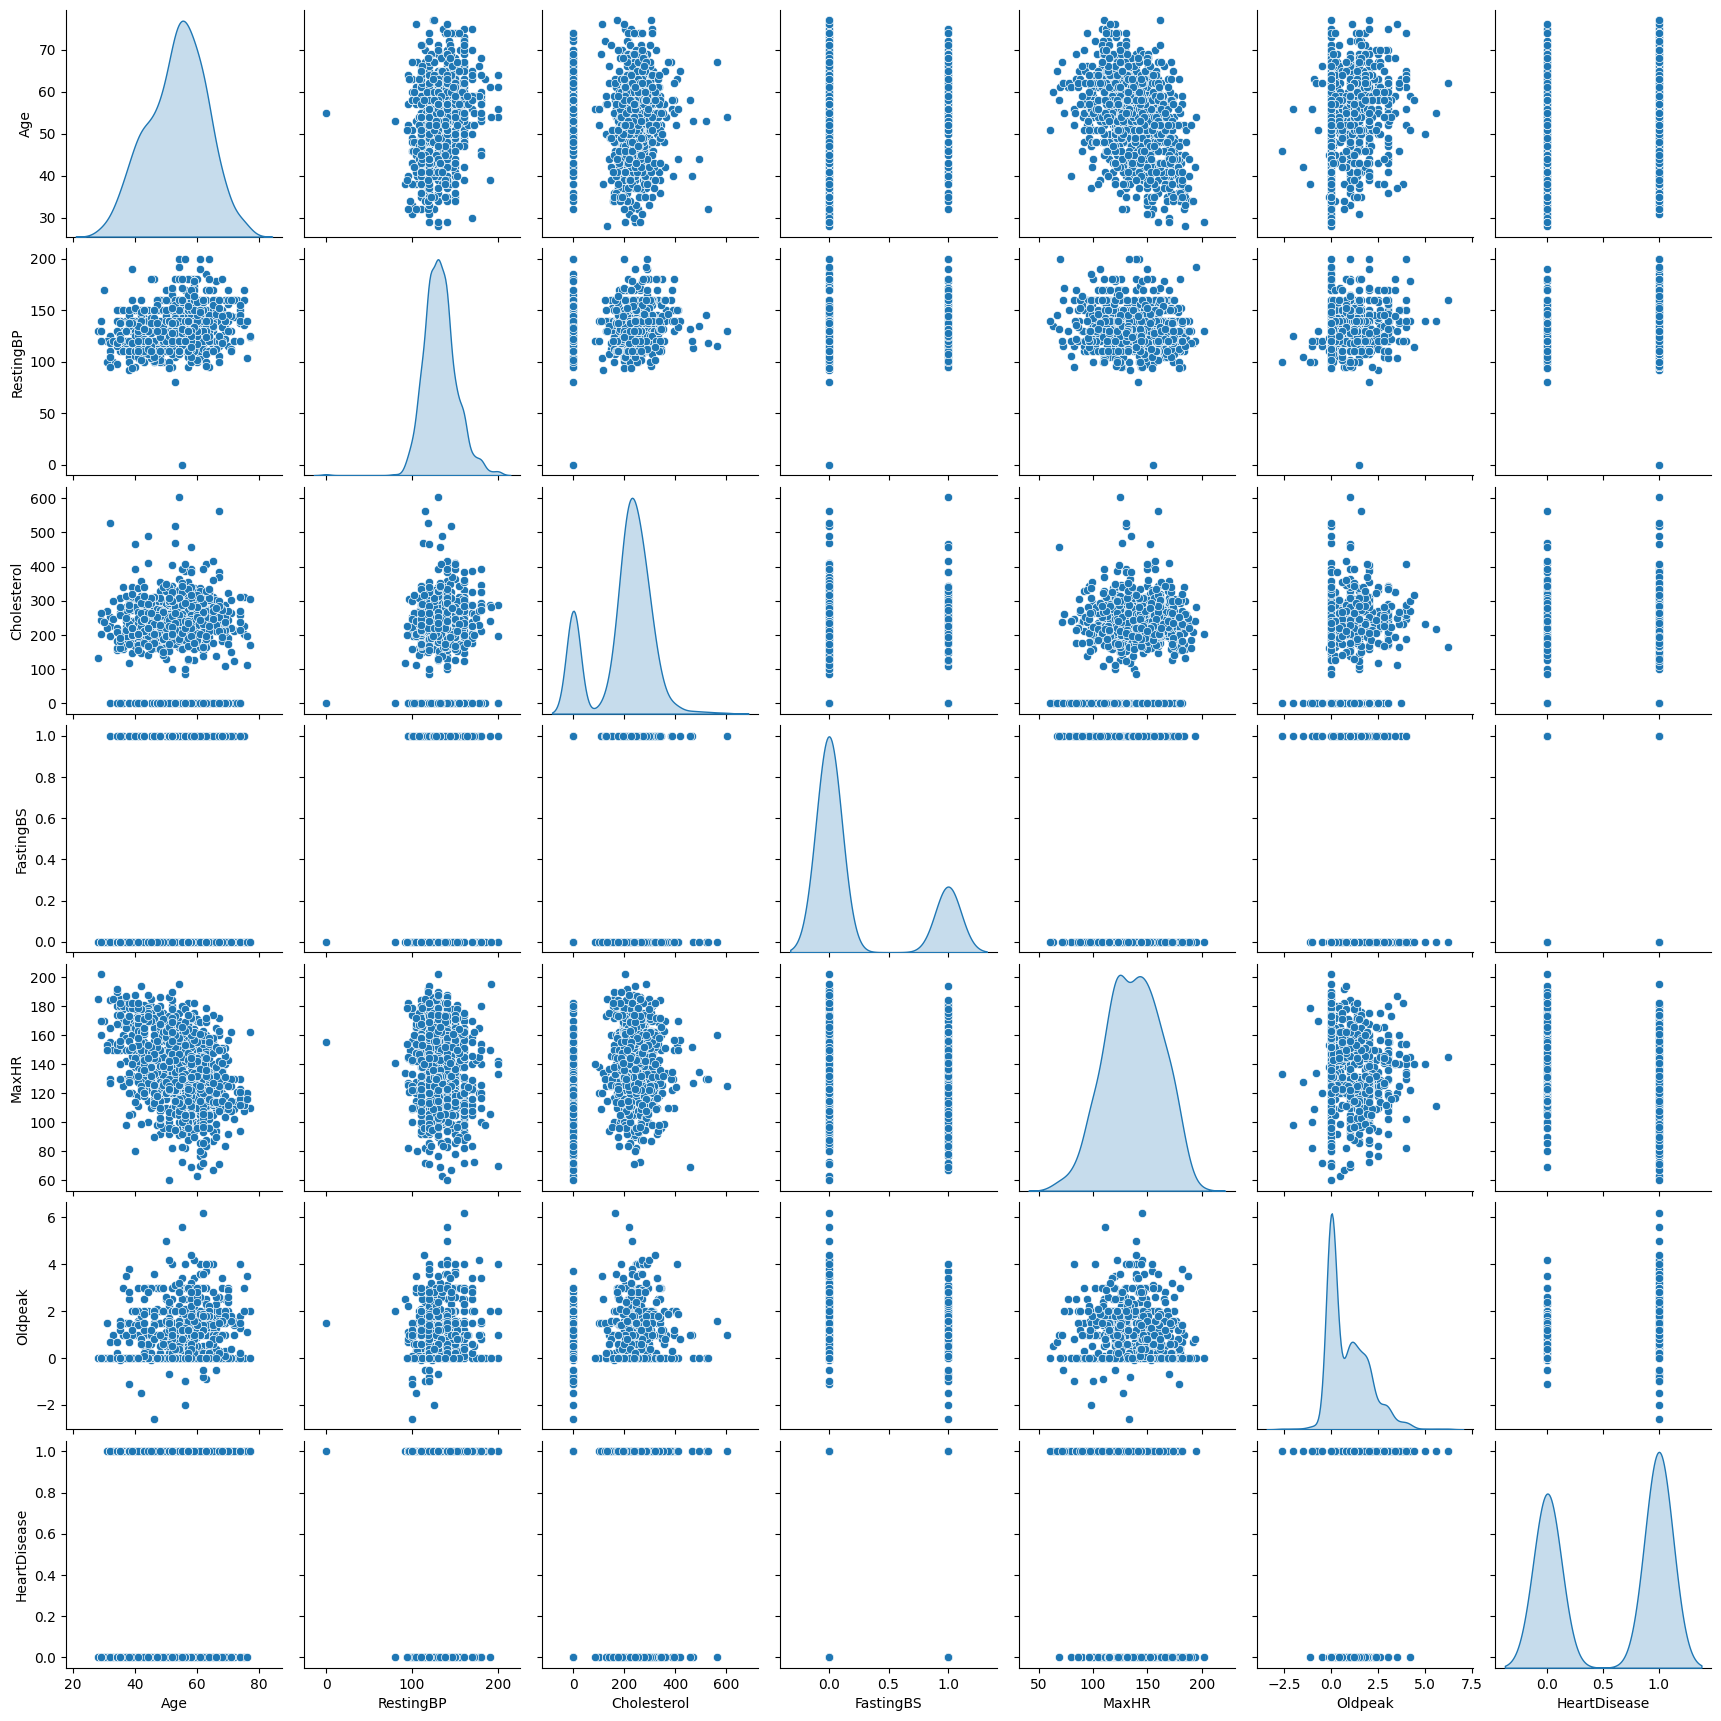

In [ ]:
sns.pairplot(df, diag_kind='kde')


**Correlation Matrix untuk Fiture Numerik**

Korelasi adalah metrik statistik yang mengukur sejauh mana dua variabel numerik bergerak bersama. Korelasi dapat berkisar antara -1 hingga 1:

    1 berarti korelasi positif sempurna: ketika satu variabel meningkat, variabel lain juga meningkat.
    -1 berarti korelasi negatif sempurna: ketika satu variabel meningkat, variabel lain menurun.
    0 berarti tidak ada hubungan linear antara variabel.

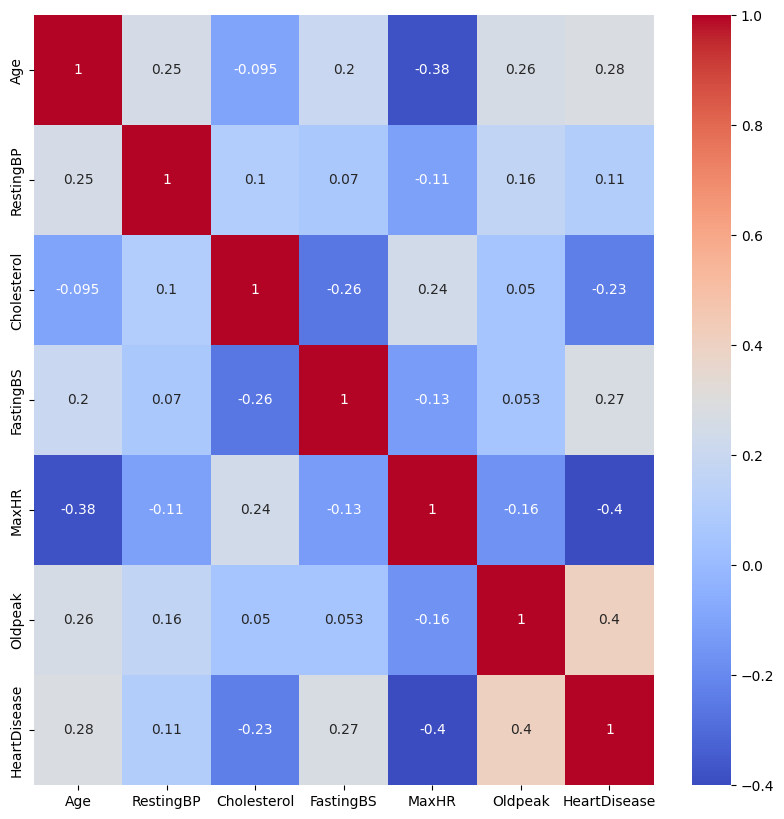

In [ ]:
# Memilih kolom numerik dari DataFrame
numerical_feature_column = df.select_dtypes(include=['float64', 'int64']).columns

# Buat heatmap untuk korelasi antar kolom numerik
plt.figure(figsize=(10, 10))
sns.heatmap(df[numerical_feature_column].corr(), annot=True, cmap='coolwarm')

# Tampilkan plot
plt.show()


**Data Preperation**

Pada tahap ini, dilakukan persiapan data sebelum memasukkannya ke dalam model machine learning. Tahapan ini sangat penting karena kualitas data yang digunakan akan sangat mempengaruhi performa model yang dibangun.

In [ ]:
x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [ ]:
x_extend_full = pd.concat([x, y], axis=1)

Encoding Categorical Features

Karena ada beberapa fitur kategorikal (seperti Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope), kita perlu mengubahnya menjadi numerik dengan One-Hot Encoding atau Label Encoding.

In [ ]:

# Encoding fitur kategorikal
categorical_encode_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']  # Tambahkan kolom kategorikal lainnya jika perlu
x_extend_full = pd.get_dummies(x_extend_full, columns=categorical_encode_features, drop_first=True)


In [ ]:
# Memisahkan kembali ke fitur dan target
x_encoded = x_extend_full.drop('HeartDisease', axis=1)
y_encoded = x_extend_full['HeartDisease']

 Train-Test Split

Kita perlu membagi dataset menjadi data training dan testing. Biasanya kita menggunakan rasio 80% training dan 20% testing.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_encoded, test_size=0.2, random_state=42)

Feature Scaling

Setelah meng-encode fitur kategorikal, kita perlu melakukan scaling pada fitur numerik untuk menormalkan nilainya.

In [ ]:

# Tentukan fitur numerik yang akan distandarisasi
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit scaler pada data training untuk fitur numerik
scaler.fit(x_train[numerical_features])

# Terapkan transformasi pada data training
x_train[numerical_features] = scaler.transform(x_train.loc[:, numerical_features])

# Terapkan transformasi pada data testing
x_test[numerical_features] = scaler.transform(x_test.loc[:, numerical_features])

# Tampilkan beberapa baris pertama dari data training yang sudah distandarisasi
print(x_train[numerical_features].head())

          Age  RestingBP  Cholesterol     MaxHR   Oldpeak
795 -1.245067  -0.708985     0.372803  2.284353 -0.097061
25  -1.886236  -0.166285     0.086146  1.652241 -0.836286
84   0.250993   0.919115     0.123134 -0.441628  0.087745
10  -1.779375  -0.166285     0.104640  0.229991 -0.836286
344 -0.283314  -0.708985    -1.846478 -1.271274 -0.836286


In [ ]:
print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 918
Total # of sample in train dataset: 734
Total # of sample in test dataset: 184


In [ ]:
# Tampilkan deskripsi statistik dari data training yang sudah distandarisasi
print(x_train[numerical_features].describe().round(4))

            Age  RestingBP  Cholesterol     MaxHR   Oldpeak
count  734.0000   734.0000     734.0000  734.0000  734.0000
mean    -0.0000     0.0000       0.0000   -0.0000    0.0000
std      1.0007     1.0007       1.0007    1.0007    1.0007
min     -2.6343    -7.2214      -1.8465   -3.0096   -3.2388
25%     -0.7108    -0.7090      -0.2098   -0.7182   -0.8363
50%      0.0373    -0.1663       0.2156    0.0720   -0.2819
75%      0.6784     0.3764       0.6410    0.7436    0.5498
max      2.4951     3.6326       3.7295    2.6004    4.8927


## **Model Development**

Di bagian ini, kita membangun beberapa model machine learning untuk memprediksi risiko penyakit jantung.

In [ ]:
models= pd.DataFrame(columns=['train_mse', 'test_mse', 'train_accuracy', 'test_accuracy'], index=['KNN', 'RF', 'Boosting'])


**K-Nearest Neighbor**

Pada bagian ini, kita akan melatih model K-Nearest Neighbors (KNN) untuk memprediksi kemungkinan penyakit jantung berdasarkan dataset yang telah dipersiapkan.

In [ ]:
# Misalnya kita ingin melatih model KNN
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
#Evaluasi Model KNN
models.loc['KNN', 'train_mse'] = mean_squared_error(y_train, KNN.predict(x_train))
models.loc['KNN', 'test_mse'] = mean_squared_error(y_test, KNN.predict(x_test))
# Akurasi
models.loc['KNN', 'train_accuracy'] = accuracy_score(y_train, KNN.predict(x_train)) * 100  # dalam persen
models.loc['KNN', 'test_accuracy'] = accuracy_score(y_test, KNN.predict(x_test)) * 100  # dalam persen

# Menampilkan hasil evaluasi models KNN
print("Model KNN:")
print("Train MSE: {:.6f}".format(models.loc['KNN', 'train_mse']))
print("Test MSE: {:.6f}".format(models.loc['KNN', 'test_mse']))
print("Train Accuracy: {:.2f}%".format(models.loc['KNN', 'train_accuracy']))
print("Test Accuracy: {:.2f}%".format(models.loc['KNN', 'test_accuracy']))


Model KNN:
Train MSE: 0.119891
Test MSE: 0.146739
Train Accuracy: 88.01%
Test Accuracy: 85.33%


**Random Forest**

Pada bagian ini, kita akan melatih model Random Forest (RF) untuk memprediksi kemungkinan penyakit jantung berdasarkan dataset yang telah dipersiapkan.

In [ ]:
RF =RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Menghitung MSE untuk Random Forest
models.loc['RF', 'train_mse'] = mean_squared_error(y_train, RF.predict(x_train))
models.loc['RF', 'test_mse'] = mean_squared_error(y_test, RF.predict(x_test))

# Menghitung akurasi untuk Random Forest
models.loc['RF', 'train_accuracy'] = accuracy_score(y_train, RF.predict(x_train)) * 100  # dalam persen
models.loc['RF', 'test_accuracy'] = accuracy_score(y_test, RF.predict(x_test)) * 100  # dalam persen

# Menampilkan hasil evaluasi models RF
print("Model Random Forest:")
print("Train MSE: {:.6f}".format(models.loc['RF', 'train_mse']))
print("Test MSE: {:.6f}".format(models.loc['RF', 'test_mse']))
print("Train Accuracy: {:.2f}%".format(models.loc['RF', 'train_accuracy']))
print("Test Accuracy: {:.2f}%".format(models.loc['RF', 'test_accuracy']))


Model Random Forest:
Train MSE: 0.000000
Test MSE: 0.125000
Train Accuracy: 100.00%
Test Accuracy: 87.50%


**Boosting Algorithm**

Pada bagian ini, kita akan melatih model GradientBoostin (Bosting) untuk memprediksi kemungkinan penyakit jantung berdasarkan dataset yang telah dipersiapkan.

In [ ]:
Boosting = GradientBoostingClassifier()
Boosting.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
# Menghitung MSE untuk model Boosting
models.loc['Boosting', 'train_mse'] = mean_squared_error(y_train, Boosting.predict(x_train))
models.loc['Boosting', 'test_mse'] = mean_squared_error(y_test, Boosting.predict(x_test))

# Menghitung akurasi
models.loc['Boosting', 'train_accuracy'] = accuracy_score(y_train, Boosting.predict(x_train)) * 100  # dalam persen
models.loc['Boosting', 'test_accuracy'] = accuracy_score(y_test, Boosting.predict(x_test)) * 100  # dalam persen

# Menampilkan hasil evaluasi models Boosting
print("Model Boosting:")
print("Train MSE: {:.6f}".format(models.loc['Boosting', 'train_mse']))
print("Test MSE: {:.6f}".format(models.loc['Boosting', 'test_mse']))
print("Train Accuracy: {:.2f}%".format(models.loc['Boosting', 'train_accuracy']))
print("Test Accuracy: {:.2f}%".format(models.loc['Boosting', 'test_accuracy']))


Model Boosting:
Train MSE: 0.061308
Test MSE: 0.135870
Train Accuracy: 93.87%
Test Accuracy: 86.41%


**Evaluation Model dengan MSE**

Setelah membangun model, kita melakukan evaluasi untuk mengukur performa model menggunakan mean squared error (MSE) untuk data latih dan data uji.

MSE (Mean Squared Error) digunakan untuk mengukur seberapa jauh prediksi model dibandingkan dengan nilai asli.
Evaluasi pada data latih: Mengukur seberapa baik model mempelajari data latih.
Evaluasi pada data uji: Mengukur seberapa baik model dapat memprediksi data yang belum pernah dilihat.

In [ ]:
mse_dict = {'KNN': KNN, "RF": RF, 'Boosting': Boosting}
mse= pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Boosting'])

In [ ]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
x_test.loc[:, numerical_features] = scaler.transform(x_test[numerical_features])

**Visualisasi Tabel  MSE dan Akurasi dengan pembulatan**


Pada Bagian ini terdapat visualisasi tabel dan MSE dan akurasi

In [ ]:
for name, model in mse_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_train, model.predict(x_train)) /1e3
  mse.loc[name, 'test'] = mean_squared_error(y_test, model.predict(x_test)) /1e3

mse

,train,test
KNN,0.00012,0.00037
RF,0.0,0.000158
Boosting,0.000061,0.000141


**Visualisasi Perbandingan MSE dari Berbagai Model**

Pada bagian ini terdapat perbandingan MSE dari Berbagai Model

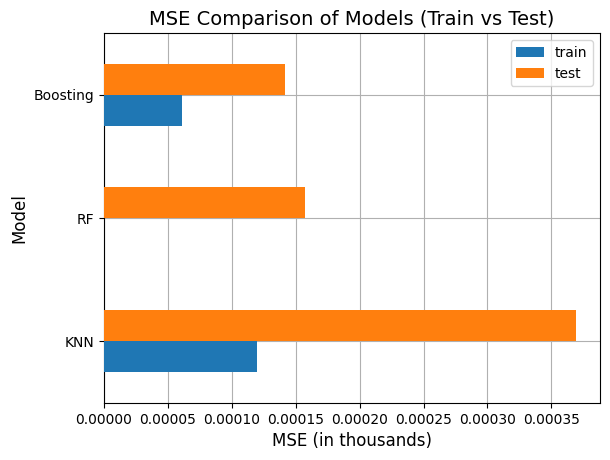

In [ ]:
# Plot MSE
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)

# Tambahkan grid
ax.grid(zorder=0)

# Tambahkan judul dan label
ax.set_title('MSE Comparison of Models (Train vs Test)', fontsize=14)
ax.set_xlabel('MSE (in thousands)', fontsize=12)
ax.set_ylabel('Model', fontsize=12)

# Tampilkan plot
plt.show()


**Improvement Model dengan HyperTurning Hyperparameter Tuning**

Melakukan tuning untuk Random Forest dan Boosting dengan Grid Search.

In [ ]:
rf_hyper = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
RF_turned =  GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_hyper,
                                   scoring='accuracy', cv=5)
RF_turned.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
tf_hypermeter = RF_turned.best_estimator_
models.loc['RF_turned', 'train_mse'] = mean_squared_error(y_train, tf_hypermeter.predict(x_train))
models.loc['RF_turned', 'test_mse'] = mean_squared_error(y_test, tf_hypermeter.predict(x_test))


train_pred_binary_rf = (tf_hypermeter.predict(x_train) > 0.5).astype(int)
test_pred_binary_rf = (tf_hypermeter.predict(x_test) > 0.5).astype(int)

models.loc['RF_turned', 'train_accuracy'] = accuracy_score(y_train, train_pred_binary_rf) * 100
models.loc['RF_turned', 'test_accuracy'] = accuracy_score(y_test, test_pred_binary_rf) * 100


In [ ]:
boost_hyper = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [ ]:
# Inisialisasi model Boosting
boosting = GradientBoostingClassifier()


In [ ]:
boost_turned =  GridSearchCV(estimator=boosting, param_grid=boost_hyper,
                                   scoring='accuracy', cv=5)
boost_turned.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
best_boost = boost_turned.best_estimator_
models.loc['Boosting_Tuned', 'train_mse'] = mean_squared_error(y_train, best_boost.predict(x_train))
models.loc['Boosting_Tuned', 'test_mse'] = mean_squared_error(y_test, best_boost.predict(x_test))

train_pred_binary_boost = (best_boost.predict(x_train) > 0.5).astype(int)
test_pred_binary_boost = (best_boost.predict(x_test) > 0.5).astype(int)

models.loc['Boosting_Tuned', 'train_accuracy'] = accuracy_score(y_train, train_pred_binary_boost) * 100
models.loc['Boosting_Tuned', 'test_accuracy'] = accuracy_score(y_test, test_pred_binary_boost) * 100


**Visualisasi Plot Penerapan Model dengan HyperTurning Hyperparameter Tuning**

Pada bagian ini terdapat Visualisasi Plot Penerapan Model dengan HyperTurning Hyperparameter Tuning

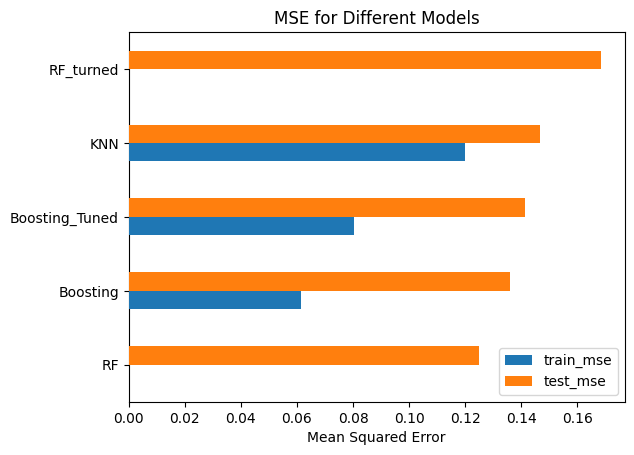

In [ ]:
# Plot MSE
fig, ax = plt.subplots()
models[['train_mse', 'test_mse']].sort_values(by='test_mse').plot(kind='barh', ax=ax, zorder=3)
plt.title('MSE for Different Models')
plt.xlabel('Mean Squared Error')
plt.show()

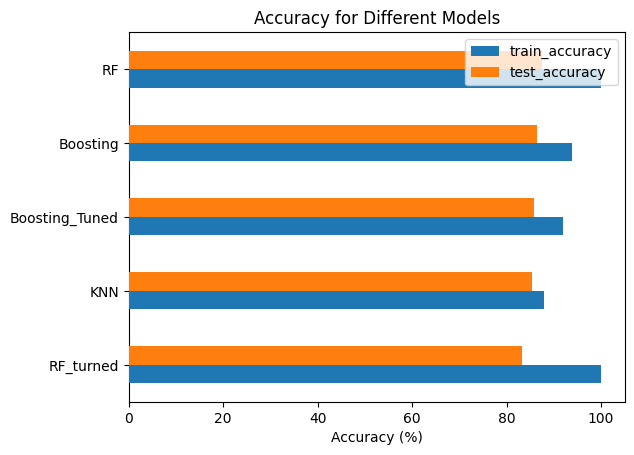

In [ ]:
# Plot Accuracy
fig, ax = plt.subplots()
models[['train_accuracy', 'test_accuracy']].sort_values(by='test_accuracy').plot(kind='barh', ax=ax, zorder=3)
plt.title('Accuracy for Different Models')
plt.xlabel('Accuracy (%)')
plt.show()

Malukan Prediksi dari berbagai model

Dalam bagian kode ini, kita melakukan prediksi menggunakan beberapa model yang telah dilatih dan membandingkan hasil prediksi tersebut dengan nilai sebenarnya

In [ ]:
predict = x_test.iloc[:1].copy()
pred = {'y_true':y_test[:1]}
for name, model in mse_dict.items():
  pred['prediksi '+name] = model.predict(predict)
pd.DataFrame(pred)

,y_true,prediksi KNN,prediksi RF,prediksi Boosting
668,0,0,0,0


**Kesimpulan**

Dengan menerapkan hyperparameter tuning memberikan dampak positif, terutama pada model-model ensemble seperti Random Forest dan Boosting. Kedua model ini menunjukkan hasil terbaik dalam memprediksi penyakit jantung dengan MSE rendah dan akurasi yang lebih tinggi setelah tuning.